<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

# 1 Some nomenclature

# 2 Comparing the two ‘dialects’

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import scienceplots



In [6]:
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

### pyplot Interface

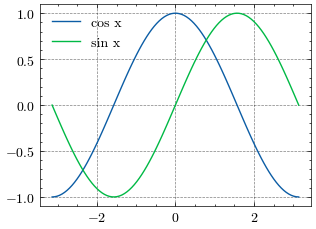

In [65]:
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()

### OO Interface

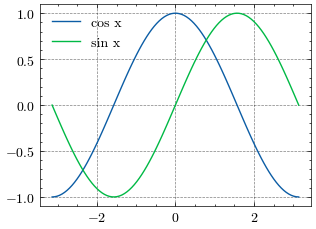

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, cos_x, label = 'cos x')
ax.plot (x,sin_x, label = 'sin x')
ax. legend()

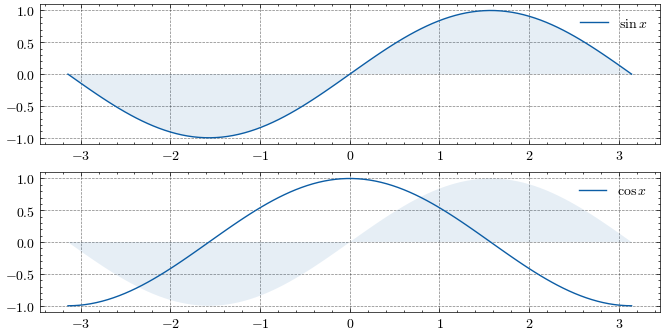

In [54]:
import scienceplots
plt.style.use(["science","no-latex"])


fig, ax = plt.subplots(  #please give me a figure and an ax 
    nrows=2,
    figsize=(8,4)
)

my_sin, my_cos = ax[1], ax[0]

my_sin.plot(x, cos_x, label='$\\cos x$')        # use axes to plot a new line
my_sin.legend()
my_cos.plot(x, sin_x, label='$\\sin x$')
my_cos.legend()

my_cos.fill_between(x,0,sin_x,alpha=.1)
my_sin.fill_between(x,0,sin_x,alpha=.1)




# 3 What is OO ax, really?

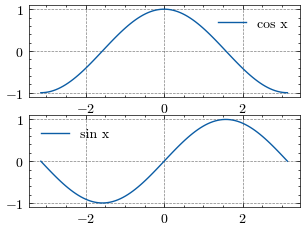

In [70]:
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(x,cos_x, label = 'cos x')
ax[1].plot(x, sin_x, label = 'sin x')

ax[0].legend()
ax[1].legend()

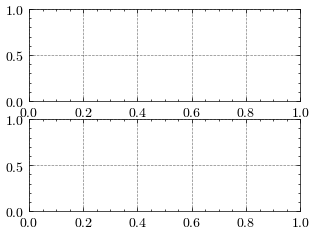

In [60]:
fig, ax = plt.subplots(ncols=1, nrows=2)

# 4 A complete OO example

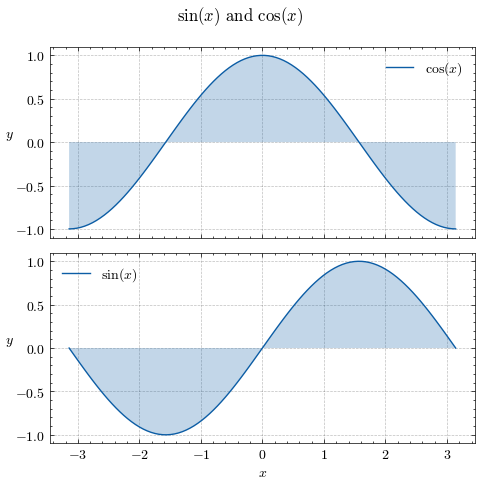

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5, 5), sharex = True)
ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:        #for loop; both graphs need y axis and legend and grid
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation = 0)

ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')        # SUPer TITLE for the whole fig # r' -> raw strings, treats backslash literally
fig.tight_layout()                              # added to figure not plot

# 5 Multiple rows and columns

### Using ax

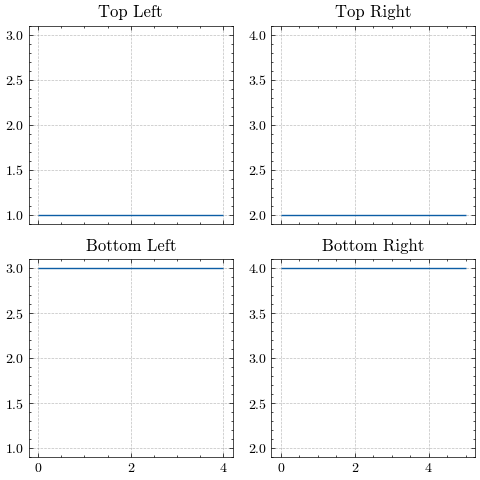

In [88]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (5,5), sharex='col', sharey = 'col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

## 5.1 Sharing axes

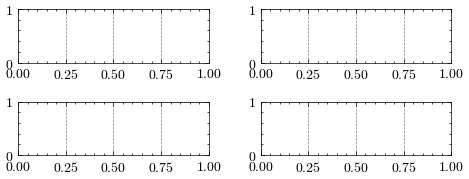

In [92]:
fig, ax = plt.subplots( nrows=2, ncols=2, figsize=(5, 2))
plt.tight_layout()

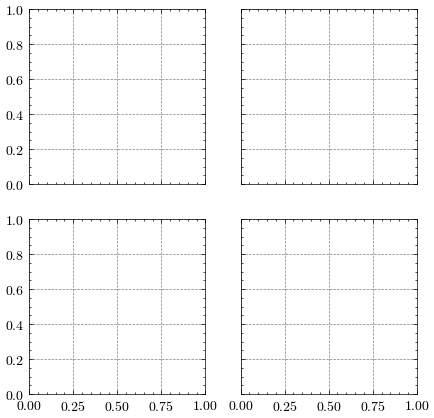

In [93]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex=True, sharey='row'
)

## 5.2 Accessing all axes

In [96]:
top_left.grid(alpha=.25)
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)


In [95]:
for a in ax.flatten():
    a.grid(alpha=.25)

# 6 Other useful plots

## 6.1 Histograms

### Data

In [ ]:

# Your code here


### A quick helper function

In [100]:
def get_plot_data():
    data = {}       #creates an empty dictionary 
    filename = '/Users/joy/Downloads/sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv' 
    data['All'] = np.loadtxt(filename, skiprows=1)

    filename = '/Users/joy/Downloads/sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)
    return data

### The histogram

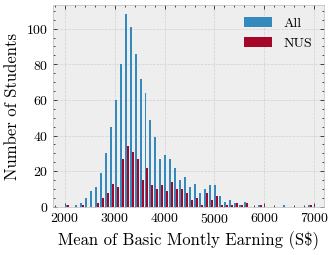

In [101]:
plt.style.use('bmh')
data = get_plot_data()

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

## 6.2 Scatter plots

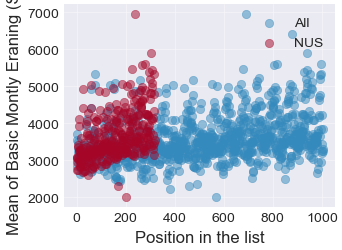

In [107]:
plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend(loc="upper right")

fig. tight_layout()

## 6.3 Bar charts

Text(0, 0.5, 'Number of Students')

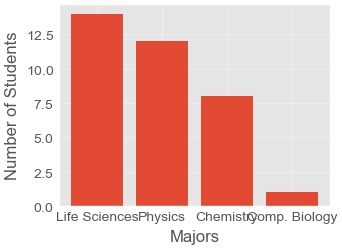

In [109]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')


## 6.4 Pie charts

Text(0.5, 1.0, 'Percentage of each major')

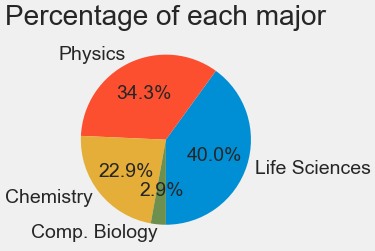

In [111]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )
plt.title('Percentage of each major')